## Homework 2

###### Guidelines to be followed (we can discuss and adjust of course, but to be consistent in the way we code)

- Jupyter Notebook should **not contain too much code** (the less code is stored here the better since it makes things much clearer)
- Pure code should be stored in **seperate .py files** (easier to review and better for version control)
- Lets try to **comment** everything we do from the beginning so that we don't have to do this boring and annoying work at the end
- Every time we have the chance of **plotting** some information lets try to do it (data visualisation is very important)

#### Some useful data set information

- Each row represents an event. There are several different types of events however:
    - **View**: A user viewed a product
    - **Cart**: A user added a product to a shopping cart
    - **Removefromcart**: A user removed a product from the shopping cart
    - **Purchase**: A user purchased a product
    
    
- A typical funnel of a client would be (leading to 3 different rows in the dataset: view >> cart >> purchase)


- **event_time**: Time of the event
- **event_type**: Event type (see above for event types)
- **product_id**: Unique identifier of product
- **category_id**: Category ID of product
- **category_code**: Code of category. If product is not a relevant one the category code is left empty (meaningfull missing)
- **brand**: Brand of product (can be missing, I guess this is not a meaningful missing)
- **price**: Float price of product
- **user_id**: Unique identifier of user
- **user_session**: Unique identifier of user session (1 *user_id* can have several *user_session* over time)


- **Example**: User with *userid* during session *usersession* added to shopping cart (*eventtype == cart*) the product *productid* of the brand *brand* of category *categorycode* with a given *price* at a given *event_time* 


**Some useful info**

1. Price is unique by product_id and event_time
    - y =full_data_set.groupby([full_data_set.event_time, full_data_set.product_id]).price.nunique()
    - len(y) == y.sum()

In [1]:
%load_ext autoreload
%autoreload 2

#### Import library and files

In [1]:
import pickle
import pandas as pd
import functionality_new as funcs

## Research Question 1

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
- What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
- How many times, on average, a user views a product before adding it to the cart?
- What’s the probability that products added once to the cart are effectively bought?
- What’s the average time an item stays in the cart before being removed?
- How much time passes on average between the first view time and a purchase/addition to cart?


**Comments**:

Zhibek


Before getting into the specific questions we would like to highlight some interesting observations we have done on the data (data issues) and discuss how we are planning to overcome/treat them:

a. The Funnel is not necesarilly view>>cart>>purchase. A user can view a product and buy it without having to put it into the cart. No action needed for this point but it is good to keep in mind when reviewing final results.

In [4]:
funcs.customer_journey_funnel(full_data_set)

user_id    user_session                          event_type
356520186  3e3403b6-2a19-4a1d-aef2-ee4dce0dc943  purchase       1
                                                 view           5
           ad1e4257-71ec-4638-b31d-9fa4033ae155  view           1
384989212  27923ca4-99d6-4652-acad-c4fd270ef902  cart           1
                                                 view           8
386070015  49d03116-3c95-4e13-8b9c-e3be97551fe8  cart           1
                                                 view           4
393619196  17de28bd-0182-44c0-8a19-5d5b8c07d60e  view           3
           ed5d037e-be8c-4c94-a8b3-ec881eecdb33  cart           2
                                                 view           2
397023870  85566778-28dd-439e-958f-a5c972133c3e  purchase       1
                                                 view           3
440756116  c31bc5b7-e14d-463c-89b0-594688e4e69d  purchase       1
                                                 view           3
441259588  69e19

b. We have observed that for unique user_sessions we can have different user_ids. We consider this to be an issue on the user_id value since the event_time in general seem to be very close to each other (we consider it hard that in seconds a person is able to change user_id while still having the same user_session). Since we have not found a clear pattern on how to fix this issue we will ignore it for now (also since the amount of cases in which this occurs is almost insignificant)

In [12]:
funcs.user_session_user_id(full_data_set)

The percentage of errors is: 0.005392925156310565  %


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4750,2019-10-01 02:27:45 UTC,view,10300637,2053013553115300101,NaN,silverlit,14.39,555463297,2759bd71-1333-4348-816d-c02912f6ebd4
5094,2019-10-01 02:28:27 UTC,view,10301026,2053013553115300101,NaN,silverlit,11.56,555463292,2759bd71-1333-4348-816d-c02912f6ebd4
155769,2019-10-01 05:26:28 UTC,view,4100138,2053013561218695907,NaN,sony,413.91,555496461,e5fa54c1-935b-41e1-bb95-06fd18cad496
167383,2019-10-01 05:37:04 UTC,view,4100346,2053013561218695907,NaN,sony,391.00,523810456,e5fa54c1-935b-41e1-bb95-06fd18cad496
434366,2019-10-01 09:24:58 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565912,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
434800,2019-10-01 09:25:20 UTC,view,1002628,2053013555631882655,electronics.smartphone,apple,397.95,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
435235,2019-10-01 09:25:43 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
435468,2019-10-01 09:25:55 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
435552,2019-10-01 09:25:59 UTC,view,1002629,2053013555631882655,electronics.smartphone,apple,377.09,555565910,fa8092eb-7df8-4bcd-866a-3b2b8eeafea5
451234,2019-10-01 09:39:11 UTC,view,1004249,2053013555631882655,electronics.smartphone,apple,738.39,555570137,42a39e3a-1ed6-40db-be9c-b21182f3dbc3


Question 1.a.

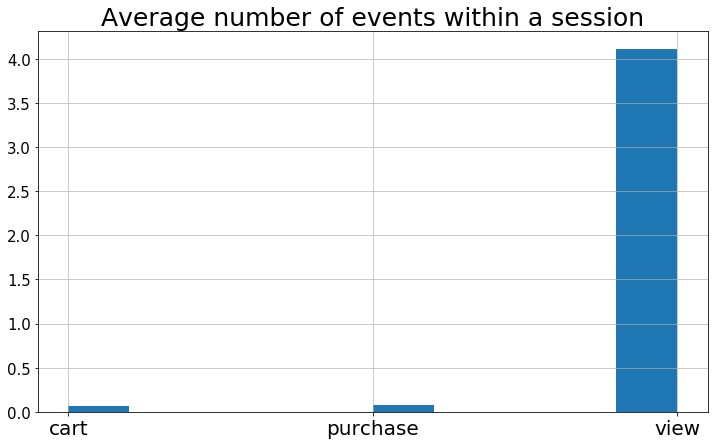

In [7]:
funcs.events_per_session(data_set=full_data_set)

Question 1.b.

In [1]:
funcs.average_views_before_cart(full_data_set)

NameError: name 'funcs' is not defined

Question 1.c.

In [4]:
funcs.probability_purchase_given_cart(full_data_set)

Question 1.d.

In [5]:
view_cart_data_set = full_data_set[(full_data_set.event_type == 'view') | (full_data_set.event_type == 'cart')]
cart_data_set = full_data_set[full_data_set.event_type == 'cart']

In [10]:
cart_and_view = view_cart_data_set[['event_time', 'event_type', 'user_session', 'product_id']].merge(
        cart_data_set[['event_time', 'user_session', 'product_id']], how='right',
        on=['product_id', 'user_session'], suffixes=('_view', '_cart'))
cart_and_view.sort_values(by=['user_session', 'product_id', 'event_time_view'])

,event_time_view,event_type,user_session,product_id,event_time_cart
142377,2019-11-01 09:53:55 UTC,view,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
142378,2019-11-01 09:54:24 UTC,cart,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
142379,2019-11-01 09:54:29 UTC,view,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
142380,2019-11-01 09:55:09 UTC,view,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2019-11-01 09:54:24 UTC
81339,2019-10-01 13:28:24 UTC,view,000fdfe4-e1f0-4a93-9c22-f04066ad895e,5100564,2019-10-01 13:32:21 UTC
...,...,...,...,...,...
135009,2019-11-01 08:45:43 UTC,view,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,1005115,2019-11-01 08:45:51 UTC
135010,2019-11-01 08:45:51 UTC,cart,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,1005115,2019-11-01 08:45:51 UTC
129613,2019-11-01 08:03:03 UTC,view,fffdbd81-e486-40fd-a74f-b9e95d1ec8f2,1005008,2019-11-01 08:03:36 UTC
129614,2019-11-01 08:03:36 UTC,cart,fffdbd81-e486-40fd-a74f-b9e95d1ec8f2,1005008,2019-11-01 08:03:36 UTC


In [11]:
cart_and_view.head(300).to_excel('test.xlsx')

In [20]:
session_product_with_multiple_events = full_data_set.groupby(['user_session', 'product_id']).event_type.nunique().reset_index(name='unique_event_type')
session_product_with_multiple_events = session_product_with_multiple_events[session_product_with_multiple_events.unique_event_type > 1]
session_product_with_multiple_events_data_set = full_data_set[full_data_set[['user_session', 'product_id']].isin(session_product_with_multiple_events[['user_session', 'product_id']])]

In [18]:
session_product_with_multiple_events[session_product_with_multiple_events.unique_event_type > 1]

,user_session,product_id,unique_event_type
77,0002c5ea-3509-4d0b-9618-7e40925005f0,9200557,2
221,00092ee4-0243-4bda-8ffd-5b905a086c7f,12703498,2
286,000d3153-6d13-49dd-b365-0ae2291f7fb8,1005115,2
316,000e56f6-1aa1-4f9a-80d3-6af831d15861,4804295,2
354,000fdfe4-e1f0-4a93-9c22-f04066ad895e,5100564,3
...,...,...,...
1180421,ffe71996-6af9-4312-bf6a-f537f8c24037,1005031,2
1180554,ffed50a3-939b-4d23-8655-3223f98065f2,1200957,2
1180650,fff30096-d345-43a4-8b01-329283095f38,4804295,2
1180654,fff4a219-f7ce-47a6-bdab-c4cd09214ce6,1005115,2


In [22]:
session_product_with_multiple_events_data_set[~session_product_with_multiple_events_data_set.event_time.isnull()]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session


In [ ]:
sorted_full_data_set.head(300).to_excel('test.xlsx')

Question 1.e.

In [ ]:
funcs.average_time_between_view_cart_purchase(full_data_set)

## Research Question 2

What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
- Plot the most visited subcategories.
- What are the 10 most sold products per category?


**Comments**:

Nicola


In [ ]:
funcs.plot_sold_product_category(full_data_set,missing_treatment='unknown_category')


In [ ]:
funcs.plot_visited_product_subcategory(full_data_set,missing_treatment='unknown_category')

In [2]:
funcs.ten_most_sold(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])

data/2019-Oct.csv
Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                 event_time event_type  product_id  \
0 2019-10-01 00:00:00+00:00       view    44600062   
1 2019-10-01 00:00:00+00:00       view     3900821   
2 2019-10-01 00:00:01+00:00       view    17200506   
3 2019-10-01 00:00:01+00:00       view     1307067   
4 2019-10-01 00:00:04+00:00       view     1004237   

                         category_code    user_id  
0                                  NaN  541312140  
1  appliances.environment.water_heater  554748717  
2           furniture.living_room.sofa  519107250  
3                   computers.notebook  550050854  
4               electronics.smartphone  535871217  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
1000000 2019-10-01 16:56:07+00:00       view     5600065   
1000001 2019-10-01 16:56:07+00:00       view    22600003   
1000002 2019-10-01 16:56:07+00:00       view     8500269   
1000003 2019-10-01 16:56:07+00:00       view     1004426   
1000004 2019-10-01 16:56:07+00:00       view     1005105   

                             category_code    user_id  
1000000  appliances.environment.air_heater  515533639  
1000001        auto.accessories.compressor  523541463  
1000002                                NaN  526731152  
1000003             electronics.smartphone  555703818  
1000004             electronics.smartphone  522768348  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
2000000 2019-10-02 14:18:42+00:00       view     4000203   
2000001 2019-10-02 14:18:42+00:00       view    44700016   
2000002 2019-10-02 14:18:42+00:00       view    12202301   
2000003 2019-10-02 14:18:42+00:00       view     9700104   
2000004 2019-10-02 14:18:42+00:00       view    32801089   

                             category_code    user_id  
2000000       construction.tools.generator  519423887  
2000001                                NaN  513429982  
2000002                      sport.bicycle  515145926  
2000003  computers.components.power_supply  548333164  
2000004                                NaN  542603052  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
3000000 2019-10-03 12:12:19+00:00       view     1801882   
3000001 2019-10-03 12:12:19+00:00       view    17300468   
3000002 2019-10-03 12:12:19+00:00       view     3701087   
3000003 2019-10-03 12:12:19+00:00       view     1004788   
3000004 2019-10-03 12:12:19+00:00       view     5000575   

                         category_code    user_id  
3000000           electronics.video.tv  512806948  
3000001                            NaN  515405315  
3000002  appliances.environment.vacuum  524652396  
3000003         electronics.smartphone  555878748  
3000004      appliances.sewing_machine  556350043  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
4000000 2019-10-04 08:38:08+00:00       view     1004873   
4000001 2019-10-04 08:38:09+00:00       view     2501796   
4000002 2019-10-04 08:38:09+00:00       view    28718009   
4000003 2019-10-04 08:38:09+00:00       view    12300396   
4000004 2019-10-04 08:38:09+00:00       view     1307073   

                    category_code    user_id  
4000000    electronics.smartphone  513929795  
4000001   appliances.kitchen.oven  524021351  
4000002             apparel.shoes  537866618  
4000003  construction.tools.drill  513112157  
4000004        computers.notebook  513411891  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
5000000 2019-10-05 01:32:45+00:00       view     1004042   
5000001 2019-10-05 01:32:45+00:00       view     2602106   
5000002 2019-10-05 01:32:45+00:00       view    38900019   
5000003 2019-10-05 01:32:46+00:00       view     1002524   
5000004 2019-10-05 01:32:46+00:00       view    12719861   

                  category_code    user_id  
5000000  electronics.smartphone  512767627  
5000001                     NaN  523718844  
5000002                     NaN  522922526  
5000003  electronics.smartphone  552592818  
5000004                     NaN  519679781  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
6000000 2019-10-05 16:25:48+00:00       view    12701705   
6000001 2019-10-05 16:25:48+00:00       view     1201472   
6000002 2019-10-05 16:25:48+00:00       view    25510241   
6000003 2019-10-05 16:25:48+00:00       view     1801909   
6000004 2019-10-05 16:25:48+00:00       view    21400996   

                category_code    user_id  
6000000                   NaN  515193325  
6000001    electronics.tablet  526024385  
6000002                   NaN  513752011  
6000003  electronics.video.tv  516462330  
6000004    electronics.clocks  516798734  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
7000000 2019-10-06 12:13:41+00:00       view    22700084   
7000001 2019-10-06 12:13:41+00:00   purchase     1004247   
7000002 2019-10-06 12:13:41+00:00       view    26400362   
7000003 2019-10-06 12:13:42+00:00       view     3601427   
7000004 2019-10-06 12:13:42+00:00       view     1004961   

                     category_code    user_id  
7000000                        NaN  557072087  
7000001     electronics.smartphone  515702401  
7000002                        NaN  552630694  
7000003  appliances.kitchen.washer  527294314  
7000004     electronics.smartphone  512898791  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
8000000 2019-10-07 08:22:34+00:00       view     5100816   
8000001 2019-10-07 08:22:34+00:00       view     1003711   
8000002 2019-10-07 08:22:34+00:00       view     2800440   
8000003 2019-10-07 08:22:34+00:00       view    21400996   
8000004 2019-10-07 08:22:34+00:00       view     2900934   

                            category_code    user_id  
8000000                               NaN  539371480  
8000001            electronics.smartphone  557638074  
8000002  appliances.kitchen.refrigerators  513706424  
8000003                electronics.clocks  543371139  
8000004      appliances.kitchen.microwave  517321018  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
9000000 2019-10-08 05:04:34+00:00       view    21407420   
9000001 2019-10-08 05:04:34+00:00       view     5100721   
9000002 2019-10-08 05:04:34+00:00       view    10100288   
9000003 2019-10-08 05:04:34+00:00       view     4802878   
9000004 2019-10-08 05:04:34+00:00       view    14701422   

                         category_code    user_id  
9000000             electronics.clocks  556090603  
9000001             electronics.clocks  514724453  
9000002                            NaN  517122787  
9000003    electronics.audio.headphone  512471870  
9000004  furniture.living_room.cabinet  518360796  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
10000000 2019-10-08 17:26:09+00:00       view     1005006   
10000001 2019-10-08 17:26:09+00:00       view    17800132   
10000002 2019-10-08 17:26:09+00:00       view     1004791   
10000003 2019-10-08 17:26:09+00:00       view    32402992   
10000004 2019-10-08 17:26:09+00:00       view    28719127   

                   category_code    user_id  
10000000  electronics.smartphone  512873159  
10000001       computers.desktop  518298401  
10000002  electronics.smartphone  551715949  
10000003                     NaN  514885086  
10000004           apparel.shoes  512981027  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
11000000 2019-10-09 13:30:35+00:00       view    49500005   
11000001 2019-10-09 13:30:35+00:00       view    26300329   
11000002 2019-10-09 13:30:36+00:00       view     2701419   
11000003 2019-10-09 13:30:36+00:00       view     8500245   
11000004 2019-10-09 13:30:36+00:00       view     1005073   

                             category_code    user_id  
11000000                               NaN  513040612  
11000001                               NaN  552486583  
11000002  appliances.kitchen.refrigerators  556975384  
11000003                               NaN  547620663  
11000004            electronics.smartphone  558462793  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
12000000 2019-10-10 09:10:10+00:00       view     2701683   
12000001 2019-10-10 09:10:10+00:00       view     1004659   
12000002 2019-10-10 09:10:10+00:00       view     1004402   
12000003 2019-10-10 09:10:10+00:00       view     8200455   
12000004 2019-10-10 09:10:10+00:00       view    17500238   

                             category_code    user_id  
12000000  appliances.kitchen.refrigerators  514107071  
12000001            electronics.smartphone  556739980  
12000002            electronics.smartphone  553375945  
12000003                               NaN  512647170  
12000004                               NaN  541022808  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
13000000 2019-10-11 04:37:09+00:00       view    13400365   
13000001 2019-10-11 04:37:09+00:00       view    14700124   
13000002 2019-10-11 04:37:09+00:00       view    12301284   
13000003 2019-10-11 04:37:09+00:00       view    45300067   
13000004 2019-10-11 04:37:09+00:00       cart     1004565   

                          category_code    user_id  
13000000                            NaN  545584699  
13000001  furniture.living_room.cabinet  512987681  
13000002       construction.tools.drill  555728488  
13000003                     kids.swing  512383960  
13000004         electronics.smartphone  541575303  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
14000000 2019-10-11 16:21:08+00:00       cart     1004839   
14000001 2019-10-11 16:21:08+00:00       view    15100009   
14000002 2019-10-11 16:21:08+00:00       view     1002524   
14000003 2019-10-11 16:21:08+00:00       view    14701139   
14000004 2019-10-11 16:21:08+00:00       view     3601242   

                          category_code    user_id  
14000000         electronics.smartphone  516445215  
14000001                            NaN  557112436  
14000002         electronics.smartphone  512471616  
14000003  furniture.living_room.cabinet  559218276  
14000004      appliances.kitchen.washer  559223629  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
15000000 2019-10-12 10:42:06+00:00       view     5100692   
15000001 2019-10-12 10:42:06+00:00       view    13500413   
15000002 2019-10-12 10:42:06+00:00       view    26400184   
15000003 2019-10-12 10:42:06+00:00       view    15700176   
15000004 2019-10-12 10:42:06+00:00   purchase    10600424   

                  category_code    user_id  
15000000     electronics.clocks  538776683  
15000001  furniture.bedroom.bed  541060676  
15000002                    NaN  516693826  
15000003                    NaN  512440461  
15000004                    NaN  531328697  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
16000000 2019-10-13 05:02:08+00:00       view     4300149   
16000001 2019-10-13 05:02:08+00:00       view    28717145   
16000002 2019-10-13 05:02:08+00:00       view    23000164   
16000003 2019-10-13 05:02:08+00:00       view    19300027   
16000004 2019-10-13 05:02:08+00:00       view     8800951   

                     category_code    user_id  
16000000                       NaN  523173164  
16000001        apparel.shoes.keds  519042894  
16000002                       NaN  539025652  
16000003  appliances.ironing_board  558995975  
16000004     electronics.telephone  513044169  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
17000000 2019-10-13 15:27:46+00:00       view     1003317   
17000001 2019-10-13 15:27:46+00:00       view    15100378   
17000002 2019-10-13 15:27:46+00:00       view     3100575   
17000003 2019-10-13 15:27:46+00:00       view     2601392   
17000004 2019-10-13 15:27:46+00:00       view     1004321   

                       category_code    user_id  
17000000      electronics.smartphone  516194116  
17000001                         NaN  556745494  
17000002  appliances.kitchen.blender  544599599  
17000003                         NaN  516349281  
17000004      electronics.smartphone  519061817  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
18000000 2019-10-14 09:39:44+00:00       view    29502248   
18000001 2019-10-14 09:39:44+00:00       view     4804295   
18000002 2019-10-14 09:39:44+00:00       view    25510425   
18000003 2019-10-14 09:39:44+00:00       view     3601425   
18000004 2019-10-14 09:39:44+00:00       view     1005073   

                        category_code    user_id  
18000000                          NaN  519030864  
18000001  electronics.audio.headphone  515842404  
18000002                          NaN  553828009  
18000003    appliances.kitchen.washer  548370822  
18000004       electronics.smartphone  516336166  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
19000000 2019-10-15 03:36:49+00:00       view    45300013   
19000001 2019-10-15 03:36:49+00:00       view     5300453   
19000002 2019-10-15 03:36:49+00:00       view     1005015   
19000003 2019-10-15 03:36:49+00:00       view     1004957   
19000004 2019-10-15 03:36:49+00:00       view    12709746   

                   category_code    user_id  
19000000              kids.swing  552622842  
19000001                     NaN  512891054  
19000002  electronics.smartphone  560315359  
19000003  electronics.smartphone  557263081  
19000004                     NaN  512848995  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
20000000 2019-10-15 15:21:05+00:00       view     1002633   
20000001 2019-10-15 15:21:06+00:00       view     2900915   
20000002 2019-10-15 15:21:06+00:00       view    13102392   
20000003 2019-10-15 15:21:06+00:00       view    15900905   
20000004 2019-10-15 15:21:06+00:00       view     1002528   

                         category_code    user_id  
20000000        electronics.smartphone  517605967  
20000001  appliances.kitchen.microwave  536870021  
20000002                           NaN  522452130  
20000003                           NaN  513664463  
20000004        electronics.smartphone  549266713  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
21000000 2019-10-16 09:25:22+00:00       view     5701000   
21000001 2019-10-16 09:25:22+00:00       view    12716450   
21000002 2019-10-16 09:25:22+00:00       view     1306833   
21000003 2019-10-16 09:25:22+00:00       view     1003306   
21000004 2019-10-16 09:25:22+00:00       view     4201337   

                                   category_code    user_id  
21000000                 auto.accessories.player  513805820  
21000001                                     NaN  560785126  
21000002                      computers.notebook  518705008  
21000003                  electronics.smartphone  537619567  
21000004  appliances.environment.air_conditioner  558079882  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
22000000 2019-10-17 02:26:38+00:00       view     1003317   
22000001 2019-10-17 02:26:38+00:00       view    54900007   
22000002 2019-10-17 02:26:39+00:00       view     3600661   
22000003 2019-10-17 02:26:39+00:00       view    23700007   
22000004 2019-10-17 02:26:39+00:00       view     7101333   

                      category_code    user_id  
22000000     electronics.smartphone  524353831  
22000001            apparel.costume  557106263  
22000002  appliances.kitchen.washer  561047048  
22000003  furniture.bedroom.blanket  518607681  
22000004      furniture.bedroom.bed  515590878  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
23000000 2019-10-17 15:55:12+00:00       view    11200512   
23000001 2019-10-17 15:55:12+00:00       view     1003306   
23000002 2019-10-17 15:55:12+00:00       view    11200189   
23000003 2019-10-17 15:55:12+00:00       view    28718825   
23000004 2019-10-17 15:55:13+00:00       view    26401046   

                       category_code    user_id  
23000000  appliances.personal.scales  531231324  
23000001      electronics.smartphone  515829937  
23000002  appliances.personal.scales  516824870  
23000003               apparel.shoes  519166506  
23000004                         NaN  521618245  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
24000000 2019-10-18 10:43:13+00:00       view    28717851   
24000001 2019-10-18 10:43:13+00:00       view    22200166   
24000002 2019-10-18 10:43:13+00:00       view     1004957   
24000003 2019-10-18 10:43:13+00:00       view    10201721   
24000004 2019-10-18 10:43:13+00:00       view     1003317   

                   category_code    user_id  
24000000           apparel.shoes  544517144  
24000001                     NaN  535170498  
24000002  electronics.smartphone  561511242  
24000003              kids.dolls  545506840  
24000004  electronics.smartphone  524778373  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
25000000 2019-10-19 04:20:53+00:00       view     5801656   
25000001 2019-10-19 04:20:53+00:00       view    26203798   
25000002 2019-10-19 04:20:53+00:00       view    12500517   
25000003 2019-10-19 04:20:53+00:00       view     3900970   
25000004 2019-10-19 04:20:53+00:00       view    12719031   

                                category_code    user_id  
25000000          electronics.audio.subwoofer  517507200  
25000001                                  NaN  544369639  
25000002                                  NaN  551598016  
25000003  appliances.environment.water_heater  513366512  
25000004                                  NaN  559023269  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
26000000 2019-10-19 16:48:36+00:00       view    15200556   
26000001 2019-10-19 16:48:36+00:00       view     1004932   
26000002 2019-10-19 16:48:36+00:00       view     1004250   
26000003 2019-10-19 16:48:36+00:00       view     4802594   
26000004 2019-10-19 16:48:36+00:00       view     1004961   

                        category_code    user_id  
26000000                          NaN  515805404  
26000001       electronics.smartphone  561970384  
26000002       electronics.smartphone  530283506  
26000003  electronics.audio.headphone  516215606  
26000004       electronics.smartphone  513848962  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
27000000 2019-10-20 10:59:53+00:00       view    28100378   
27000001 2019-10-20 10:59:53+00:00       view     4804428   
27000002 2019-10-20 10:59:53+00:00       view     1005209   
27000003 2019-10-20 10:59:54+00:00       view    28718444   
27000004 2019-10-20 10:59:54+00:00       view    18001494   

                        category_code    user_id  
27000000                          NaN  516086429  
27000001  electronics.audio.headphone  556348345  
27000002       electronics.smartphone  522949336  
27000003           apparel.shoes.keds  552085583  
27000004                          NaN  514883066  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
28000000 2019-10-21 04:52:17+00:00       view     3600666   
28000001 2019-10-21 04:52:17+00:00       view     1004856   
28000002 2019-10-21 04:52:17+00:00       view     1003306   
28000003 2019-10-21 04:52:17+00:00       view     3601366   
28000004 2019-10-21 04:52:17+00:00       view     5100875   

                      category_code    user_id  
28000000  appliances.kitchen.washer  562465653  
28000001     electronics.smartphone  514229741  
28000002     electronics.smartphone  523165242  
28000003  appliances.kitchen.washer  532321775  
28000004         electronics.clocks  537470086  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
29000000 2019-10-21 17:30:46+00:00       view     9900139   
29000001 2019-10-21 17:30:46+00:00       view     7003143   
29000002 2019-10-21 17:30:46+00:00       view     3100544   
29000003 2019-10-21 17:30:46+00:00       view     2200980   
29000004 2019-10-21 17:30:46+00:00       view    26204721   

                        category_code    user_id  
29000000  electronics.video.projector  518007355  
29000001                kids.carriage  520688040  
29000002   appliances.kitchen.blender  522751504  
29000003                          NaN  513710636  
29000004                          NaN  536393407  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
30000000 2019-10-22 13:03:26+00:00       view     1005098   
30000001 2019-10-22 13:03:26+00:00       view     6400351   
30000002 2019-10-22 13:03:26+00:00       view     4900181   
30000003 2019-10-22 13:03:26+00:00       view     3700600   
30000004 2019-10-22 13:03:26+00:00       view     1004565   

                          category_code    user_id  
30000000         electronics.smartphone  544423385  
30000001       computers.components.cpu  515111694  
30000002      appliances.kitchen.juicer  518480777  
30000003  appliances.environment.vacuum  526081260  
30000004         electronics.smartphone  557013574  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
31000000 2019-10-23 07:37:05+00:00   purchase     1004665   
31000001 2019-10-23 07:37:06+00:00       view     1004249   
31000002 2019-10-23 07:37:06+00:00       view    21410082   
31000003 2019-10-23 07:37:06+00:00       view     2600803   
31000004 2019-10-23 07:37:06+00:00       view     1004856   

                   category_code    user_id  
31000000  electronics.smartphone  563010087  
31000001  electronics.smartphone  558309093  
31000002      electronics.clocks  563226243  
31000003                     NaN  554097981  
31000004  electronics.smartphone  563230178  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
32000000 2019-10-23 21:59:44+00:00       view     1005021   
32000001 2019-10-23 21:59:44+00:00       view     4300361   
32000002 2019-10-23 21:59:45+00:00       view    26400291   
32000003 2019-10-23 21:59:45+00:00       view     1005063   
32000004 2019-10-23 21:59:46+00:00       view    10800148   

                   category_code    user_id  
32000000  electronics.smartphone  541333635  
32000001                     NaN  519641980  
32000002                     NaN  515272837  
32000003  electronics.smartphone  527720371  
32000004                     NaN  551189947  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
33000000 2019-10-24 16:14:17+00:00       view     1005157   
33000001 2019-10-24 16:14:17+00:00       view     1005109   
33000002 2019-10-24 16:14:17+00:00       view     1201296   
33000003 2019-10-24 16:14:17+00:00       view     1005253   
33000004 2019-10-24 16:14:17+00:00       view     1003771   

                   category_code    user_id  
33000000  electronics.smartphone  554411189  
33000001  electronics.smartphone  522934174  
33000002      electronics.tablet  513317046  
33000003  electronics.smartphone  517574662  
33000004  electronics.smartphone  547162000  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
34000000 2019-10-25 11:23:39+00:00       view     2900733   
34000001 2019-10-25 11:23:39+00:00       view     1307293   
34000002 2019-10-25 11:23:39+00:00       view    32402971   
34000003 2019-10-25 11:23:39+00:00       view     1005031   
34000004 2019-10-25 11:23:39+00:00       view    22700438   

                         category_code    user_id  
34000000  appliances.kitchen.microwave  542331637  
34000001            computers.notebook  559735198  
34000002                           NaN  545766064  
34000003        electronics.smartphone  561913546  
34000004                           NaN  521104450  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
35000000 2019-10-26 05:39:54+00:00       view    15100108   
35000001 2019-10-26 05:39:54+00:00       view     2601438   
35000002 2019-10-26 05:39:54+00:00       view    11600234   
35000003 2019-10-26 05:39:54+00:00       view     1004958   
35000004 2019-10-26 05:39:54+00:00       view     1801691   

                   category_code    user_id  
35000000                     NaN  529087573  
35000001                     NaN  516300733  
35000002       computers.desktop  518034306  
35000003  electronics.smartphone  562268837  
35000004    electronics.video.tv  514156566  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
36000000 2019-10-26 18:53:25+00:00       view     6801061   
36000001 2019-10-26 18:53:25+00:00       view     1004912   
36000002 2019-10-26 18:53:25+00:00       view    28704108   
36000003 2019-10-26 18:53:25+00:00       view    15700045   
36000004 2019-10-26 18:53:25+00:00       view     1004944   

                     category_code    user_id  
36000000  computers.components.hdd  531739933  
36000001    electronics.smartphone  523696285  
36000002        apparel.shoes.keds  534823011  
36000003                       NaN  517656586  
36000004    electronics.smartphone  542014960  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
37000000 2019-10-27 14:27:53+00:00       view     8500183   
37000001 2019-10-27 14:27:53+00:00       view    26404576   
37000002 2019-10-27 14:27:53+00:00       view    38900028   
37000003 2019-10-27 14:27:53+00:00       view     3601513   
37000004 2019-10-27 14:27:53+00:00       view     1307136   

                      category_code    user_id  
37000000                        NaN  515522664  
37000001                        NaN  517702979  
37000002                        NaN  518673586  
37000003  appliances.kitchen.washer  558041638  
37000004         computers.notebook  514157029  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
38000000 2019-10-28 10:09:03+00:00       view     3601402   
38000001 2019-10-28 10:09:03+00:00       view     1801690   
38000002 2019-10-28 10:09:03+00:00       view    11100268   
38000003 2019-10-28 10:09:03+00:00       view    49300090   
38000004 2019-10-28 10:09:03+00:00       view     1004184   

                       category_code    user_id  
38000000   appliances.kitchen.washer  549168640  
38000001        electronics.video.tv  516672146  
38000002  appliances.personal.scales  512428662  
38000003                         NaN  565000459  
38000004      electronics.smartphone  565002169  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
39000000 2019-10-29 06:15:54+00:00       view     3601405   
39000001 2019-10-29 06:15:54+00:00       view     5701002   
39000002 2019-10-29 06:15:54+00:00       view     3701001   
39000003 2019-10-29 06:15:54+00:00       view    15100377   
39000004 2019-10-29 06:15:54+00:00       view    18001508   

                          category_code    user_id  
39000000      appliances.kitchen.washer  520993933  
39000001        auto.accessories.player  542766524  
39000002  appliances.environment.vacuum  540791478  
39000003                            NaN  527923836  
39000004                            NaN  561967336  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
40000000 2019-10-30 00:49:16+00:00       view    14100000   
40000001 2019-10-30 00:49:17+00:00       view     4300296   
40000002 2019-10-30 00:49:17+00:00       view    22700524   
40000003 2019-10-30 00:49:17+00:00       view    15100314   
40000004 2019-10-30 00:49:18+00:00       view     3700779   

                          category_code    user_id  
40000000     electronics.audio.acoustic  520958738  
40000001                            NaN  565589424  
40000002                            NaN  546336325  
40000003                            NaN  516361763  
40000004  appliances.environment.vacuum  562256294  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
41000000 2019-10-30 17:22:08+00:00       view    28900019   
41000001 2019-10-30 17:22:08+00:00       view     1003726   
41000002 2019-10-30 17:22:08+00:00       view    18300912   
41000003 2019-10-30 17:22:09+00:00       view    12711945   
41000004 2019-10-30 17:22:09+00:00       view     4502339   

                   category_code    user_id  
41000000                     NaN  555253911  
41000001  electronics.smartphone  565852240  
41000002         accessories.bag  558472321  
41000003                     NaN  521092950  
41000004  appliances.kitchen.hob  514451335  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 448764
                        event_time event_type  product_id  \
42000000 2019-10-31 14:44:19+00:00       view     1004767   
42000001 2019-10-31 14:44:19+00:00       view    17200651   
42000002 2019-10-31 14:44:19+00:00       view     8800773   
42000003 2019-10-31 14:44:19+00:00       view    26400313   
42000004 2019-10-31 14:44:19+00:00       view     5800788   

                        category_code    user_id  
42000000       electronics.smartphone  566155761  
42000001   furniture.living_room.sofa  550074531  
42000002        electronics.telephone  523970919  
42000003                          NaN  559249905  
42000004  electronics.audio.subwoofer  512466469  
data/2019-Nov.csv


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                 event_time event_type  product_id              category_code  \
0 2019-11-01 00:00:00+00:00       view     1003461     electronics.smartphone   
1 2019-11-01 00:00:00+00:00       view     5000088  appliances.sewing_machine   
2 2019-11-01 00:00:01+00:00       view    17302664                        NaN   
3 2019-11-01 00:00:01+00:00       view     3601530  appliances.kitchen.washer   
4 2019-11-01 00:00:01+00:00       view     1004775     electronics.smartphone   

     user_id  
0  520088904  
1  530496790  
2  561587266  
3  518085591  
4  558856683  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
1000000 2019-11-01 15:32:10+00:00       view     4200542   
1000001 2019-11-01 15:32:10+00:00       view    38900084   
1000002 2019-11-01 15:32:10+00:00       view     2602038   
1000003 2019-11-01 15:32:10+00:00       view     1005116   
1000004 2019-11-01 15:32:10+00:00       view     2300329   

                                  category_code    user_id  
1000000  appliances.environment.air_conditioner  515189193  
1000001                                     NaN  516484311  
1000002                                     NaN  565634001  
1000003                  electronics.smartphone  566503793  
1000004                electronics.camera.video  561890500  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
2000000 2019-11-02 09:40:42+00:00       view     2701642   
2000001 2019-11-02 09:40:42+00:00       view    58300001   
2000002 2019-11-02 09:40:42+00:00       view     1004659   
2000003 2019-11-02 09:40:42+00:00       view     1307310   
2000004 2019-11-02 09:40:42+00:00       view     5100263   

                            category_code    user_id  
2000000  appliances.kitchen.refrigerators  563450914  
2000001                               NaN  523297504  
2000002            electronics.smartphone  566727540  
2000003                computers.notebook  514160527  
2000004                electronics.clocks  566291662  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
3000000 2019-11-02 23:53:31+00:00       view    45601495   
3000001 2019-11-02 23:53:31+00:00       view     3901174   
3000002 2019-11-02 23:53:32+00:00       view    26205106   
3000003 2019-11-02 23:53:32+00:00       view    16000004   
3000004 2019-11-02 23:53:32+00:00       view    23301518   

                               category_code    user_id  
3000000                        apparel.shoes  513016710  
3000001  appliances.environment.water_heater  560258490  
3000002                                  NaN  512869018  
3000003                                  NaN  566949709  
3000004                                  NaN  512401084  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
4000000 2019-11-03 14:05:58+00:00       view     1004767   
4000001 2019-11-03 14:05:58+00:00       view     4600542   
4000002 2019-11-03 14:05:58+00:00       view    14300093   
4000003 2019-11-03 14:05:58+00:00   purchase     1005122   
4000004 2019-11-03 14:05:58+00:00       view     2602206   

                               category_code    user_id  
4000000               electronics.smartphone  567140550  
4000001        appliances.kitchen.dishwasher  514302244  
4000002  electronics.audio.music_tools.piano  530965196  
4000003               electronics.smartphone  564412991  
4000004                                  NaN  546495093  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
5000000 2019-11-04 07:09:03+00:00       view    22800109   
5000001 2019-11-04 07:09:03+00:00       view     1802037   
5000002 2019-11-04 07:09:04+00:00       view     4501774   
5000003 2019-11-04 07:09:04+00:00   purchase    43200112   
5000004 2019-11-04 07:09:04+00:00       view    29501508   

                  category_code    user_id  
5000000                     NaN  512542815  
5000001    electronics.video.tv  516851199  
5000002  appliances.kitchen.hob  515444757  
5000003          apparel.tshirt  542634185  
5000004                     NaN  567360122  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
6000000 2019-11-04 16:51:07+00:00   purchase    17300783   
6000001 2019-11-04 16:51:07+00:00       view    28300432   
6000002 2019-11-04 16:51:07+00:00       view     1005159   
6000003 2019-11-04 16:51:07+00:00       view     1307449   
6000004 2019-11-04 16:51:07+00:00       view     4804056   

                       category_code    user_id  
6000000                          NaN  520894954  
6000001           accessories.wallet  514622821  
6000002       electronics.smartphone  567484037  
6000003           computers.notebook  512551549  
6000004  electronics.audio.headphone  549339958  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
7000000 2019-11-05 09:38:29+00:00       view     2701737   
7000001 2019-11-05 09:38:29+00:00       view     3101022   
7000002 2019-11-05 09:38:29+00:00       view     2200937   
7000003 2019-11-05 09:38:29+00:00       view    10400703   
7000004 2019-11-05 09:38:29+00:00       view     2702277   

                            category_code    user_id  
7000000  appliances.kitchen.refrigerators  565658975  
7000001        appliances.kitchen.blender  516630914  
7000002                               NaN  514692563  
7000003                         kids.toys  512457059  
7000004  appliances.kitchen.refrigerators  530502970  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
8000000 2019-11-05 19:27:53+00:00       view     4804718   
8000001 2019-11-05 19:27:53+00:00       view     1004659   
8000002 2019-11-05 19:27:53+00:00       view     1801550   
8000003 2019-11-05 19:27:53+00:00       view    12712084   
8000004 2019-11-05 19:27:53+00:00       view     2300201   

                       category_code    user_id  
8000000  electronics.audio.headphone  514395924  
8000001       electronics.smartphone  519792901  
8000002         electronics.video.tv  515513880  
8000003                          NaN  555742353  
8000004     electronics.camera.video  567947964  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                       event_time event_type  product_id  \
9000000 2019-11-06 13:17:28+00:00       view    15100025   
9000001 2019-11-06 13:17:29+00:00       view     1005217   
9000002 2019-11-06 13:17:29+00:00       view    17200229   
9000003 2019-11-06 13:17:29+00:00       view     1005115   
9000004 2019-11-06 13:17:29+00:00       view    17501040   

                      category_code    user_id  
9000000                         NaN  514598147  
9000001      electronics.smartphone  557642609  
9000002  furniture.living_room.sofa  566350113  
9000003      electronics.smartphone  541344079  
9000004                         NaN  548519601  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id       category_code  \
10000000 2019-11-07 05:08:21+00:00       view    49500009                 NaN   
10000001 2019-11-07 05:08:21+00:00       view    21411528  electronics.clocks   
10000002 2019-11-07 05:08:22+00:00       view    29502570                 NaN   
10000003 2019-11-07 05:08:22+00:00       view     5100564  electronics.clocks   
10000004 2019-11-07 05:08:22+00:00       view    12711282                 NaN   

            user_id  
10000000  523416847  
10000001  513165988  
10000002  523394666  
10000003  512843129  
10000004  568421760  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
11000000 2019-11-07 15:08:55+00:00       view     3300484   
11000001 2019-11-07 15:08:55+00:00       view    14700132   
11000002 2019-11-07 15:08:55+00:00       view     2400648   
11000003 2019-11-07 15:08:55+00:00       view     5100853   
11000004 2019-11-07 15:08:55+00:00       view    12705690   

                          category_code    user_id  
11000000                            NaN  522900475  
11000001  furniture.living_room.cabinet  524775941  
11000002        appliances.kitchen.hood  553493863  
11000003             electronics.clocks  512915867  
11000004                            NaN  559571734  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
12000000 2019-11-08 07:21:36+00:00       view    32800915   
12000001 2019-11-08 07:21:36+00:00       view    32403829   
12000002 2019-11-08 07:21:36+00:00       view    40900001   
12000003 2019-11-08 07:21:37+00:00       view     7201773   
12000004 2019-11-08 07:21:37+00:00       view    14700159   

                          category_code    user_id  
12000000                            NaN  565928545  
12000001                            NaN  516259645  
12000002    construction.tools.painting  568845341  
12000003                            NaN  567328689  
12000004  furniture.living_room.cabinet  545649016  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
13000000 2019-11-08 16:14:33+00:00       view     1005160   
13000001 2019-11-08 16:14:33+00:00       cart     1004797   
13000002 2019-11-08 16:14:34+00:00       view     1500469   
13000003 2019-11-08 16:14:34+00:00       view    13200859   
13000004 2019-11-08 16:14:34+00:00       cart     1004723   

                          category_code    user_id  
13000000         electronics.smartphone  556603858  
13000001         electronics.smartphone  514230766  
13000002  computers.peripherals.printer  513566414  
13000003          furniture.bedroom.bed  569025891  
13000004         electronics.smartphone  569021965  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
14000000 2019-11-09 08:12:05+00:00       view    17200570   
14000001 2019-11-09 08:12:05+00:00       view     1004565   
14000002 2019-11-09 08:12:05+00:00       view   100000277   
14000003 2019-11-09 08:12:05+00:00       view     1004564   
14000004 2019-11-09 08:12:05+00:00       view    12100563   

                       category_code    user_id  
14000000  furniture.living_room.sofa  513376193  
14000001      electronics.smartphone  567905710  
14000002                         NaN  531614139  
14000003      electronics.smartphone  567738358  
14000004                 kids.skates  512808006  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
15000000 2019-11-09 17:19:14+00:00       view    46100012   
15000001 2019-11-09 17:19:14+00:00       view    26300636   
15000002 2019-11-09 17:19:14+00:00       view     1401631   
15000003 2019-11-09 17:19:14+00:00       view     5800860   
15000004 2019-11-09 17:19:14+00:00       view     1307229   

                        category_code    user_id  
15000000                          NaN  512468675  
15000001                          NaN  518056768  
15000002            computers.desktop  513697698  
15000003  electronics.audio.subwoofer  529248298  
15000004           computers.notebook  569243953  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
16000000 2019-11-10 09:16:02+00:00       view    56900014   
16000001 2019-11-10 09:16:02+00:00       view     1005006   
16000002 2019-11-10 09:16:02+00:00       view     1480492   
16000003 2019-11-10 09:16:02+00:00       view     3700779   
16000004 2019-11-10 09:16:02+00:00       view     3601485   

                          category_code    user_id  
16000000                            NaN  569624136  
16000001         electronics.smartphone  545243779  
16000002              computers.desktop  569628704  
16000003  appliances.environment.vacuum  559777725  
16000004      appliances.kitchen.washer  569624087  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
17000000 2019-11-10 17:40:19+00:00       view    26300785   
17000001 2019-11-10 17:40:19+00:00       view     1005177   
17000002 2019-11-10 17:40:19+00:00       view     1005161   
17000003 2019-11-10 17:40:19+00:00       view    29100047   
17000004 2019-11-10 17:40:19+00:00       view    34700076   

                         category_code    user_id  
17000000                           NaN  559805519  
17000001        electronics.smartphone  518118417  
17000002        electronics.smartphone  526551225  
17000003  appliances.personal.massager  568346346  
17000004                           NaN  536180502  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
18000000 2019-11-11 09:36:46+00:00       view    19100065   
18000001 2019-11-11 09:36:46+00:00       view     4804581   
18000002 2019-11-11 09:36:47+00:00       view     1004446   
18000003 2019-11-11 09:36:47+00:00       view     1005014   
18000004 2019-11-11 09:36:47+00:00       view     6000207   

                        category_code    user_id  
18000000       construction.tools.saw  570062480  
18000001  electronics.audio.headphone  519233094  
18000002       electronics.smartphone  569059058  
18000003       electronics.smartphone  515181140  
18000004       auto.accessories.alarm  543504373  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
19000000 2019-11-11 17:34:15+00:00       view    12701624   
19000001 2019-11-11 17:34:15+00:00       view     1480584   
19000002 2019-11-11 17:34:15+00:00       view     3601343   
19000003 2019-11-11 17:34:15+00:00       view    13104949   
19000004 2019-11-11 17:34:15+00:00       view    26203980   

                      category_code    user_id  
19000000                        NaN  570235070  
19000001          computers.desktop  560884698  
19000002  appliances.kitchen.washer  534402848  
19000003                        NaN  517439792  
19000004                        NaN  513292122  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
20000000 2019-11-12 09:29:11+00:00       view     1004720   
20000001 2019-11-12 09:29:11+00:00       view     1003768   
20000002 2019-11-12 09:29:11+00:00       view     7100183   
20000003 2019-11-12 09:29:11+00:00       view     4804660   
20000004 2019-11-12 09:29:11+00:00       view     1004249   

                        category_code    user_id  
20000000       electronics.smartphone  512466039  
20000001       electronics.smartphone  570049046  
20000002        furniture.bedroom.bed  562012768  
20000003  electronics.audio.headphone  541696425  
20000004       electronics.smartphone  515353271  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
21000000 2019-11-12 17:41:15+00:00       view    12707254   
21000001 2019-11-12 17:41:15+00:00       view     3901108   
21000002 2019-11-12 17:41:15+00:00       view    21400008   
21000003 2019-11-12 17:41:15+00:00       view     4100151   
21000004 2019-11-12 17:41:15+00:00       view     1004836   

                                category_code    user_id  
21000000                                  NaN  558107566  
21000001  appliances.environment.water_heater  536304247  
21000002                   electronics.clocks  521450245  
21000003                                  NaN  518907246  
21000004               electronics.smartphone  512604868  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
22000000 2019-11-13 09:30:58+00:00       view     4700383   
22000001 2019-11-13 09:30:58+00:00       view     5801218   
22000002 2019-11-13 09:30:58+00:00       view     1004961   
22000003 2019-11-13 09:30:58+00:00       view     2800399   
22000004 2019-11-13 09:30:58+00:00       view    17303006   

                             category_code    user_id  
22000000    auto.accessories.videoregister  512716262  
22000001       electronics.audio.subwoofer  546207606  
22000002            electronics.smartphone  570924364  
22000003  appliances.kitchen.refrigerators  550819219  
22000004                               NaN  515009268  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
23000000 2019-11-13 17:38:18+00:00       view     1004666   
23000001 2019-11-13 17:38:18+00:00       cart    33000528   
23000002 2019-11-13 17:38:18+00:00       view     5500256   
23000003 2019-11-13 17:38:18+00:00       view     3700755   
23000004 2019-11-13 17:38:18+00:00       view    10300161   

                          category_code    user_id  
23000000         electronics.smartphone  569201374  
23000001                            NaN  566777505  
23000002                            NaN  562860044  
23000003  appliances.environment.vacuum  513506634  
23000004                            NaN  528346935  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
24000000 2019-11-14 08:39:08+00:00       view     1005232   
24000001 2019-11-14 08:39:08+00:00       cart     3600666   
24000002 2019-11-14 08:39:09+00:00       view     1005160   
24000003 2019-11-14 08:39:09+00:00       view     1005239   
24000004 2019-11-14 08:39:09+00:00       view    26500318   

                      category_code    user_id  
24000000     electronics.smartphone  530056071  
24000001  appliances.kitchen.washer  517658709  
24000002     electronics.smartphone  556643578  
24000003     electronics.smartphone  512886445  
24000004                        NaN  541888295  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
25000000 2019-11-14 15:41:36+00:00   purchase     1005261   
25000001 2019-11-14 15:41:36+00:00       view    21408430   
25000002 2019-11-14 15:41:37+00:00       view     2702277   
25000003 2019-11-14 15:41:37+00:00       view     1005015   
25000004 2019-11-14 15:41:37+00:00       view    34800201   

                             category_code    user_id  
25000000            electronics.smartphone  513000337  
25000001                electronics.clocks  512720473  
25000002  appliances.kitchen.refrigerators  528263396  
25000003            electronics.smartphone  516872124  
25000004                               NaN  527382679  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
26000000 2019-11-14 20:16:36+00:00       view     1005069   
26000001 2019-11-14 20:16:36+00:00       view    26403348   
26000002 2019-11-14 20:16:36+00:00       view     4804055   
26000003 2019-11-14 20:16:36+00:00       view     1004665   
26000004 2019-11-14 20:16:36+00:00       view    26204907   

                        category_code    user_id  
26000000       electronics.smartphone  563718974  
26000001                          NaN  514930949  
26000002  electronics.audio.headphone  522564934  
26000003       electronics.smartphone  516749204  
26000004                          NaN  513402884  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
27000000 2019-11-15 03:18:19+00:00       view     6800226   
27000001 2019-11-15 03:18:19+00:00       view    15600013   
27000002 2019-11-15 03:18:19+00:00       cart     6800226   
27000003 2019-11-15 03:18:20+00:00       view     3500204   
27000004 2019-11-15 03:18:20+00:00       view    57800007   

                      category_code    user_id  
27000000  appliances.kitchen.kettle  528046430  
27000001                        NaN  518643466  
27000002  appliances.kitchen.kettle  528046430  
27000003                        NaN  514521202  
27000004                        NaN  552770604  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
28000000 2019-11-15 06:48:55+00:00       cart    26400266   
28000001 2019-11-15 06:48:55+00:00       view    15100309   
28000002 2019-11-15 06:48:55+00:00       cart     3600835   
28000003 2019-11-15 06:48:55+00:00       view     1002531   
28000004 2019-11-15 06:48:55+00:00       view    28101130   

                      category_code    user_id  
28000000                        NaN  568667672  
28000001                        NaN  571709971  
28000002  appliances.kitchen.washer  525010462  
28000003     electronics.smartphone  544940961  
28000004                        NaN  543289470  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id       category_code  \
29000000 2019-11-15 09:49:13+00:00       view    34800583                 NaN   
29000001 2019-11-15 09:49:13+00:00       view    28717204  apparel.shoes.keds   
29000002 2019-11-15 09:49:13+00:00       cart     1307067  computers.notebook   
29000003 2019-11-15 09:49:13+00:00       view    23800079                 NaN   
29000004 2019-11-15 09:49:13+00:00       view   100004499                 NaN   

            user_id  
29000000  513195924  
29000001  571458276  
29000002  563257791  
29000003  516448577  
29000004  568992477  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
30000000 2019-11-15 13:06:42+00:00       view    35700021   
30000001 2019-11-15 13:06:42+00:00       view    28720559   
30000002 2019-11-15 13:06:42+00:00       cart     1801849   
30000003 2019-11-15 13:06:42+00:00       view    14700017   
30000004 2019-11-15 13:06:43+00:00       view     1306747   

                          category_code    user_id  
30000000      appliances.kitchen.kettle  545240916  
30000001                  apparel.shoes  571689816  
30000002           electronics.video.tv  518113957  
30000003  furniture.living_room.cabinet  525128376  
30000004             computers.notebook  537843165  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
31000000 2019-11-15 16:13:39+00:00       view    17301639   
31000001 2019-11-15 16:13:39+00:00       view     3601060   
31000002 2019-11-15 16:13:39+00:00       view     1004781   
31000003 2019-11-15 16:13:39+00:00       view     1004849   
31000004 2019-11-15 16:13:39+00:00       view     1004565   

                      category_code    user_id  
31000000                        NaN  515260266  
31000001  appliances.kitchen.washer  571908937  
31000002     electronics.smartphone  570855378  
31000003     electronics.smartphone  538140974  
31000004     electronics.smartphone  519182135  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id      category_code  \
32000000 2019-11-15 19:17:22+00:00       view    28400915    accessories.bag   
32000001 2019-11-15 19:17:22+00:00       view    28715814                NaN   
32000002 2019-11-15 19:17:22+00:00       view    15800060                NaN   
32000003 2019-11-15 19:17:22+00:00       view    26401893                NaN   
32000004 2019-11-15 19:17:22+00:00       view     1480556  computers.desktop   

            user_id  
32000000  512627296  
32000001  519901462  
32000002  513161904  
32000003  516475223  
32000004  518344341  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
33000000 2019-11-16 03:12:25+00:00       cart     1004767   
33000001 2019-11-16 03:12:25+00:00       view     1003712   
33000002 2019-11-16 03:12:25+00:00       view     1004839   
33000003 2019-11-16 03:12:25+00:00       view     1003310   
33000004 2019-11-16 03:12:25+00:00       view     2601790   

                   category_code    user_id  
33000000  electronics.smartphone  548540119  
33000001  electronics.smartphone  539612299  
33000002  electronics.smartphone  531522181  
33000003  electronics.smartphone  526591224  
33000004                     NaN  546967828  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
34000000 2019-11-16 06:21:22+00:00       view     1005105   
34000001 2019-11-16 06:21:22+00:00       view     1004249   
34000002 2019-11-16 06:21:22+00:00       view     1802033   
34000003 2019-11-16 06:21:22+00:00       view     4803807   
34000004 2019-11-16 06:21:22+00:00       view     3900774   

                                category_code    user_id  
34000000               electronics.smartphone  545785015  
34000001               electronics.smartphone  547260122  
34000002                 electronics.video.tv  565261339  
34000003          electronics.audio.headphone  524730326  
34000004  appliances.environment.water_heater  565442179  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
35000000 2019-11-16 08:59:22+00:00       view   100003944   
35000001 2019-11-16 08:59:22+00:00       view     4600007   
35000002 2019-11-16 08:59:22+00:00       view    10900240   
35000003 2019-11-16 08:59:22+00:00       view    42300019   
35000004 2019-11-16 08:59:22+00:00       view    10502345   

                          category_code    user_id  
35000000                  apparel.shoes  571964068  
35000001  appliances.kitchen.dishwasher  517080120  
35000002       appliances.kitchen.mixer  543954299  
35000003  furniture.living_room.cabinet  513895793  
35000004                            NaN  514679554  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
36000000 2019-11-16 11:39:52+00:00       view     3600661   
36000001 2019-11-16 11:39:52+00:00       view    12703432   
36000002 2019-11-16 11:39:52+00:00       view     1003312   
36000003 2019-11-16 11:39:52+00:00       view    12400401   
36000004 2019-11-16 11:39:52+00:00       view    30000218   

                       category_code    user_id  
36000000   appliances.kitchen.washer  530807291  
36000001                         NaN  532960822  
36000002      electronics.smartphone  514321345  
36000003    construction.tools.drill  530757755  
36000004  construction.tools.welding  569561503  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
37000000 2019-11-16 14:24:30+00:00       view    12703494   
37000001 2019-11-16 14:24:30+00:00       view     1005174   
37000002 2019-11-16 14:24:30+00:00       view    26203760   
37000003 2019-11-16 14:24:30+00:00       view    17200551   
37000004 2019-11-16 14:24:30+00:00       view     1005161   

                       category_code    user_id  
37000000                         NaN  559485151  
37000001      electronics.smartphone  571594296  
37000002                         NaN  533774817  
37000003  furniture.living_room.sofa  517886831  
37000004      electronics.smartphone  514113343  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
38000000 2019-11-16 17:27:51+00:00       view     5100566   
38000001 2019-11-16 17:27:51+00:00       cart    53900041   
38000002 2019-11-16 17:27:51+00:00       view     1801503   
38000003 2019-11-16 17:27:51+00:00       view     5100328   
38000004 2019-11-16 17:27:51+00:00       view    24900165   

                   category_code    user_id  
38000000      electronics.clocks  513993009  
38000001  construction.tools.saw  512395471  
38000002    electronics.video.tv  513888133  
38000003      electronics.clocks  518674770  
38000004                     NaN  514346867  


C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
39000000 2019-11-16 21:31:31+00:00       view     3600937   
39000001 2019-11-16 21:31:31+00:00       cart     5100566   
39000002 2019-11-16 21:31:31+00:00       view     4804572   
39000003 2019-11-16 21:31:31+00:00       view     1005129   
39000004 2019-11-16 21:31:31+00:00       view     1801623   

                        category_code    user_id  
39000000    appliances.kitchen.washer  554960557  
39000001           electronics.clocks  535087488  
39000002  electronics.audio.headphone  571707603  
39000003       electronics.smartphone  543268356  
39000004         electronics.video.tv  513354736  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
40000000 2019-11-17 05:21:20+00:00       view     5300093   
40000001 2019-11-17 05:21:20+00:00       view     3700313   
40000002 2019-11-17 05:21:20+00:00       view    28102152   
40000003 2019-11-17 05:21:20+00:00       view    12706655   
40000004 2019-11-17 05:21:20+00:00   purchase     6800659   

                          category_code    user_id  
40000000                            NaN  551002596  
40000001  appliances.environment.vacuum  519669764  
40000002                            NaN  572245573  
40000003                            NaN  564369422  
40000004       computers.components.hdd  518870427  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
41000000 2019-11-17 08:03:53+00:00       view     4000111   
41000001 2019-11-17 08:03:53+00:00       view     6701146   
41000002 2019-11-17 08:03:53+00:00       view    21400929   
41000003 2019-11-17 08:03:53+00:00       view    26400759   
41000004 2019-11-17 08:03:53+00:00       view    48300005   

                            category_code    user_id  
41000000     construction.tools.generator  552063762  
41000001  computers.components.videocards  565861146  
41000002               electronics.clocks  530395003  
41000003                              NaN  534509336  
41000004                              NaN  540789456  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
42000000 2019-11-17 10:57:57+00:00       view     1003992   
42000001 2019-11-17 10:57:57+00:00   purchase     1307065   
42000002 2019-11-17 10:57:57+00:00       view     3700748   
42000003 2019-11-17 10:57:57+00:00       view     1801882   
42000004 2019-11-17 10:57:57+00:00       view    22700852   

                          category_code    user_id  
42000000         electronics.smartphone  525770204  
42000001             computers.notebook  536741584  
42000002  appliances.environment.vacuum  512969078  
42000003           electronics.video.tv  518390934  
42000004                            NaN  519838464  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
43000000 2019-11-17 13:06:37+00:00       view    17200010   
43000001 2019-11-17 13:06:37+00:00       view    28722046   
43000002 2019-11-17 13:06:37+00:00       view    21000056   
43000003 2019-11-17 13:06:37+00:00       view    15700015   
43000004 2019-11-17 13:06:37+00:00       view     1005115   

                       category_code    user_id  
43000000  furniture.living_room.sofa  572271019  
43000001               apparel.shoes  514686005  
43000002             accessories.bag  515393485  
43000003                         NaN  558473761  
43000004      electronics.smartphone  524934140  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
44000000 2019-11-17 15:13:14+00:00       view     1801785   
44000001 2019-11-17 15:13:14+00:00       view     2702452   
44000002 2019-11-17 15:13:14+00:00       view    19200004   
44000003 2019-11-17 15:13:14+00:00       view     2701387   
44000004 2019-11-17 15:13:14+00:00       view    15100047   

                             category_code    user_id  
44000000              electronics.video.tv  569386856  
44000001  appliances.kitchen.refrigerators  570167936  
44000002            construction.tools.saw  570003857  
44000003  appliances.kitchen.refrigerators  544428640  
44000004                               NaN  515503960  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
45000000 2019-11-17 17:25:50+00:00       cart    10701101   
45000001 2019-11-17 17:25:50+00:00       view    28717487   
45000002 2019-11-17 17:25:50+00:00   purchase    26400304   
45000003 2019-11-17 17:25:50+00:00       cart     1801766   
45000004 2019-11-17 17:25:50+00:00       view     1480600   

                 category_code    user_id  
45000000                   NaN  531738584  
45000001         apparel.shoes  536854502  
45000002                   NaN  570269030  
45000003  electronics.video.tv  516997732  
45000004     computers.desktop  512741596  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
46000000 2019-11-18 06:55:53+00:00       view     1005256   
46000001 2019-11-18 06:55:53+00:00       view     1004565   
46000002 2019-11-18 06:55:53+00:00   purchase     1004856   
46000003 2019-11-18 06:55:53+00:00       view    28722129   
46000004 2019-11-18 06:55:53+00:00       view    17600728   

                   category_code    user_id  
46000000  electronics.smartphone  512678230  
46000001  electronics.smartphone  524264082  
46000002  electronics.smartphone  567662138  
46000003      apparel.shoes.keds  550525486  
46000004                     NaN  513434772  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
47000000 2019-11-18 15:51:10+00:00       view     1700574   
47000001 2019-11-18 15:51:10+00:00       view    28712258   
47000002 2019-11-18 15:51:10+00:00       view    26200040   
47000003 2019-11-18 15:51:10+00:00       view    19200005   
47000004 2019-11-18 15:51:10+00:00       view     5000691   

                          category_code    user_id  
47000000  computers.peripherals.monitor  513268450  
47000001                  apparel.shoes  553282473  
47000002                            NaN  552441338  
47000003         construction.tools.saw  516592329  
47000004      appliances.sewing_machine  550993219  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
48000000 2019-11-19 07:57:35+00:00       view     7202600   
48000001 2019-11-19 07:57:35+00:00       view    21401211   
48000002 2019-11-19 07:57:35+00:00       view    26400251   
48000003 2019-11-19 07:57:35+00:00       view    28000020   
48000004 2019-11-19 07:57:35+00:00       view     1005073   

                   category_code    user_id  
48000000                     NaN  572620656  
48000001      electronics.clocks  562015717  
48000002                     NaN  513770327  
48000003                     NaN  572323291  
48000004  electronics.smartphone  529899396  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
49000000 2019-11-19 17:36:35+00:00       view     1004402   
49000001 2019-11-19 17:36:35+00:00       view    10900382   
49000002 2019-11-19 17:36:35+00:00       view     2601793   
49000003 2019-11-19 17:36:35+00:00       view     1005186   
49000004 2019-11-19 17:36:35+00:00       view    26500703   

                     category_code    user_id  
49000000    electronics.smartphone  541514965  
49000001  appliances.kitchen.mixer  540850565  
49000002                       NaN  513083227  
49000003    electronics.smartphone  534269209  
49000004                       NaN  545298084  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
50000000 2019-11-20 10:55:57+00:00       cart     1004838   
50000001 2019-11-20 10:55:57+00:00       view     1307401   
50000002 2019-11-20 10:55:57+00:00       view     5100776   
50000003 2019-11-20 10:55:57+00:00       view    28722241   
50000004 2019-11-20 10:55:57+00:00       view    15100405   

                   category_code    user_id  
50000000  electronics.smartphone  525032814  
50000001      computers.notebook  519338435  
50000002      electronics.clocks  556719723  
50000003           apparel.shoes  556703266  
50000004                     NaN  557792130  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
51000000 2019-11-21 02:41:58+00:00       view    13200139   
51000001 2019-11-21 02:41:58+00:00       view     1004870   
51000002 2019-11-21 02:41:58+00:00       view     1005115   
51000003 2019-11-21 02:41:58+00:00       view     9200752   
51000004 2019-11-21 02:41:58+00:00       view     5100610   

                           category_code    user_id  
51000000           furniture.bedroom.bed  573503476  
51000001          electronics.smartphone  518831360  
51000002          electronics.smartphone  512591871  
51000003  computers.peripherals.keyboard  574194039  
51000004              electronics.clocks  513665567  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
52000000 2019-11-21 14:15:42+00:00       view    12711360   
52000001 2019-11-21 14:15:42+00:00       view    10701101   
52000002 2019-11-21 14:15:42+00:00       view     7600542   
52000003 2019-11-21 14:15:42+00:00       view    30901068   
52000004 2019-11-21 14:15:42+00:00       view    18700018   

                        category_code    user_id  
52000000                          NaN  548022244  
52000001                          NaN  542767977  
52000002                          NaN  574458409  
52000003  computers.components.cooler  574454677  
52000004                          NaN  555256363  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
53000000 2019-11-22 07:15:28+00:00       view    12707254   
53000001 2019-11-22 07:15:28+00:00       view    49100037   
53000002 2019-11-22 07:15:28+00:00       view     1002525   
53000003 2019-11-22 07:15:28+00:00       view     1002633   
53000004 2019-11-22 07:15:28+00:00       view     1307478   

                   category_code    user_id  
53000000                     NaN  574788512  
53000001                     NaN  558474276  
53000002  electronics.smartphone  559852631  
53000003  electronics.smartphone  538607892  
53000004      computers.notebook  574787219  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
54000000 2019-11-22 18:06:19+00:00       view     5800200   
54000001 2019-11-22 18:06:19+00:00   purchase     1004767   
54000002 2019-11-22 18:06:19+00:00       view     1004741   
54000003 2019-11-22 18:06:19+00:00       view    53900009   
54000004 2019-11-22 18:06:19+00:00       view    12708879   

                        category_code    user_id  
54000000  electronics.audio.subwoofer  513717171  
54000001       electronics.smartphone  531087636  
54000002       electronics.smartphone  565959288  
54000003       construction.tools.saw  574066849  
54000004                          NaN  572509328  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
55000000 2019-11-23 12:34:57+00:00       view    28000069   
55000001 2019-11-23 12:34:57+00:00       view    26500121   
55000002 2019-11-23 12:34:57+00:00       view     6201221   
55000003 2019-11-23 12:34:57+00:00       view     2900958   
55000004 2019-11-23 12:34:57+00:00       view     1004836   

                              category_code    user_id  
55000000                                NaN  553743404  
55000001                                NaN  514634066  
55000002  appliances.environment.air_heater  512393807  
55000003       appliances.kitchen.microwave  515562873  
55000004             electronics.smartphone  554285194  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
56000000 2019-11-24 06:02:57+00:00       view    11400745   
56000001 2019-11-24 06:02:57+00:00       cart     1004856   
56000002 2019-11-24 06:02:57+00:00       view    24100271   
56000003 2019-11-24 06:02:57+00:00       view    12709948   
56000004 2019-11-24 06:02:57+00:00       view     5200102   

                   category_code    user_id  
56000000                     NaN  570795738  
56000001  electronics.smartphone  566982508  
56000002                     NaN  513059247  
56000003                     NaN  522021683  
56000004        computers.ebooks  526976526  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
57000000 2019-11-24 16:40:22+00:00       view     1801559   
57000001 2019-11-24 16:40:22+00:00       view     1004749   
57000002 2019-11-24 16:40:22+00:00       view     4804497   
57000003 2019-11-24 16:40:22+00:00       view   100005125   
57000004 2019-11-24 16:40:22+00:00       view    28718451   

                        category_code    user_id  
57000000         electronics.video.tv  512947764  
57000001       electronics.smartphone  557210501  
57000002  electronics.audio.headphone  543808078  
57000003                          NaN  525504606  
57000004           apparel.shoes.keds  545405808  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
58000000 2019-11-25 10:30:30+00:00   purchase     1004565   
58000001 2019-11-25 10:30:30+00:00       view    42000076   
58000002 2019-11-25 10:30:30+00:00       view     5801218   
58000003 2019-11-25 10:30:30+00:00       view    12800087   
58000004 2019-11-25 10:30:30+00:00       view     1004836   

                        category_code    user_id  
58000000       electronics.smartphone  553288432  
58000001                          NaN  550546056  
58000002  electronics.audio.subwoofer  552727295  
58000003                          NaN  564352857  
58000004       electronics.smartphone  564253266  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
59000000 2019-11-26 03:12:45+00:00       view     1004250   
59000001 2019-11-26 03:12:45+00:00       view     3900339   
59000002 2019-11-26 03:12:45+00:00       view     1004230   
59000003 2019-11-26 03:12:45+00:00       view    22300003   
59000004 2019-11-26 03:12:45+00:00       view    23000419   

                                category_code    user_id  
59000000               electronics.smartphone  561294217  
59000001  appliances.environment.water_heater  574005157  
59000002               electronics.smartphone  576834354  
59000003                                  NaN  558557600  
59000004                                  NaN  560698402  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
60000000 2019-11-26 14:26:57+00:00       view    16600166   
60000001 2019-11-26 14:26:57+00:00       view     2701995   
60000002 2019-11-26 14:26:57+00:00       view     2900958   
60000003 2019-11-26 14:26:57+00:00       cart     5701246   
60000004 2019-11-26 14:26:57+00:00       view     1005004   

                             category_code    user_id  
60000000                               NaN  576659486  
60000001  appliances.kitchen.refrigerators  517182670  
60000002      appliances.kitchen.microwave  535100506  
60000003           auto.accessories.player  516363369  
60000004            electronics.smartphone  568833506  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
61000000 2019-11-27 07:56:28+00:00       cart    10700138   
61000001 2019-11-27 07:56:28+00:00       view    17500158   
61000002 2019-11-27 07:56:28+00:00       cart     1600452   
61000003 2019-11-27 07:56:28+00:00       view    10600010   
61000004 2019-11-27 07:56:28+00:00       view    25900022   

                          category_code    user_id  
61000000                            NaN  577496444  
61000001                            NaN  519061681  
61000002  computers.peripherals.printer  512748734  
61000003                            NaN  516063615  
61000004    computers.components.cooler  515050725  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
62000000 2019-11-27 17:36:37+00:00       view    26200615   
62000001 2019-11-27 17:36:37+00:00       view     5100719   
62000002 2019-11-27 17:36:37+00:00       view    12709562   
62000003 2019-11-27 17:36:37+00:00       view     4804102   
62000004 2019-11-27 17:36:37+00:00       view     5400602   

                        category_code    user_id  
62000000                          NaN  577789058  
62000001           electronics.clocks  550686254  
62000002                          NaN  537465299  
62000003  electronics.audio.headphone  533016944  
62000004                          NaN  519440305  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
63000000 2019-11-28 11:42:41+00:00       view     4300328   
63000001 2019-11-28 11:42:41+00:00       view    30200002   
63000002 2019-11-28 11:42:41+00:00       view     4804055   
63000003 2019-11-28 11:42:41+00:00       view     1005253   
63000004 2019-11-28 11:42:41+00:00       view     1004870   

                        category_code    user_id  
63000000                          NaN  578181826  
63000001                          NaN  574268958  
63000002  electronics.audio.headphone  574047956  
63000003       electronics.smartphone  567436979  
63000004       electronics.smartphone  542074783  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
64000000 2019-11-29 03:23:49+00:00       view    26203807   
64000001 2019-11-29 03:23:49+00:00       view     3700691   
64000002 2019-11-29 03:23:49+00:00       view    26400197   
64000003 2019-11-29 03:23:49+00:00       view     1005105   
64000004 2019-11-29 03:23:49+00:00       view     3601522   

                          category_code    user_id  
64000000                            NaN  540201383  
64000001  appliances.environment.vacuum  514540349  
64000002                            NaN  560212369  
64000003         electronics.smartphone  516088133  
64000004      appliances.kitchen.washer  571887347  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
65000000 2019-11-29 13:57:03+00:00       view     1801790   
65000001 2019-11-29 13:57:03+00:00       view    12600063   
65000002 2019-11-29 13:57:03+00:00       view    48400005   
65000003 2019-11-29 13:57:03+00:00       view     1801690   
65000004 2019-11-29 13:57:03+00:00       view     3601127   

                      category_code    user_id  
65000000       electronics.video.tv  529130179  
65000001   appliances.kitchen.grill  535520325  
65000002                        NaN  562562519  
65000003       electronics.video.tv  537760064  
65000004  appliances.kitchen.washer  574190417  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 1000000
                        event_time event_type  product_id  \
66000000 2019-11-30 05:37:29+00:00       view     2401235   
66000001 2019-11-30 05:37:29+00:00       view     1004856   
66000002 2019-11-30 05:37:29+00:00       cart     1002544   
66000003 2019-11-30 05:37:29+00:00       view     7901040   
66000004 2019-11-30 05:37:29+00:00       view     5800378   

                        category_code    user_id  
66000000      appliances.kitchen.hood  534228033  
66000001       electronics.smartphone  514491725  
66000002       electronics.smartphone  541681165  
66000003      furniture.kitchen.chair  522112537  
66000004  electronics.audio.subwoofer  549670180  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

Column names: ['event_time', 'event_type', 'product_id', 'category_code', 'user_id']
Length of chunk: 501979
                        event_time event_type  product_id  \
67000000 2019-11-30 15:45:03+00:00       view     1004798   
67000001 2019-11-30 15:45:03+00:00       view     4000194   
67000002 2019-11-30 15:45:03+00:00       view    22400115   
67000003 2019-11-30 15:45:03+00:00       view     5600301   
67000004 2019-11-30 15:45:03+00:00       view     1801858   

                         category_code    user_id  
67000000        electronics.smartphone  562235376  
67000001  construction.tools.generator  568416725  
67000002  electronics.audio.microphone  546201360  
67000003                           NaN  576995083  
67000004          electronics.video.tv  514039751  


C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:363: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk_purchase['category'] = chunk_purchase['category_code'].apply(lambda x: x.split('.')[0])
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\juanm\Documents\Master\Data Science\Algorithmic_Methods_Data_Mining_Lab\Project\Homework_2\functionality_new.py:369: SettingWithCopyWarni

,event_time,category,product_id,totale_pezzi
12730,10,electronics,1004856,28944
12662,10,electronics,1004767,21806
12709,10,electronics,1004833,12697
12899,10,electronics,1005115,12543
14206,10,electronics,4804056,12381
...,...,...,...,...
35004,11,country_yard,27600082,3
35019,11,country_yard,30500022,3
35008,11,country_yard,27600214,2
35020,11,country_yard,30500023,2


## Research Question 3

For each category, what’s the brand whose prices are higher on average?
- Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.
- Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.


**Comments**:

I am doing the average without doing any kind of event_type filter, would this give me the wanted price value? If not I would not know by what event type to filter...
Maybe intuitevly we should do this exercise over unique product_ids (so what is the average price over unique products over brand and category)

# TODO: review the text

**Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.**

Before doing any analysis we have reviewed the columns of interest and have detected that many brands are missing. This is obviously a data issue, but it can still give us relevant information (we can assume that missing brand names are from unknown brands). For this reason we will categorize missing brand values with the value 'unknown_brand'. 

We will group by category and brand, computing the average price. Once we have this result we will sort the resulting average price and keep the first observation of each group.

*Most up-to-date*
1. Replace missing brand values with unknown_brand >> Missing brands might be from not famous brands, therefore these missing observations could still be useful for our client
2. Our data set is organized based on events. We are not interested in the events, we are only interested in the price of the products of the brand (which is unique at product_id and event_time level).
3. A unique price can be obtained by dropping duplicates based on category_id, brand, product_id and event_time.dt.month
4. After dropping all the non-unique rows of category_id, brand, product_id and event_time.dt.month we compute the average price of a product at month level and then compute the average of the resulting price over the whole brand

Question regaring the plot is equal with the only difference that we would first filter the by the category_id


In [ ]:
funcs.plot_average_price_brand_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])

Running data_set: data/2019-Oct.csv


In [3]:
sorted_series, highest_price_brands = funcs.category_brand_highest_price(data_sets=['data/2019-Oct.csv', 
                                                                                    'data/2019-Nov.csv'])

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


Finished pre-processing data


In [4]:
sorted_series

parent_category  brand         
accessories      weekend           514.170000
                 coccinelle        274.288298
                 dometic           224.335714
                 omabelle          202.390000
                 persona           187.905000
                                      ...    
unknown_brand    heinz               1.131667
                 freshfruit          1.030000
                 clevercompany       1.030000
                 vakosa              0.990000
                 enlightenbrick      0.970000
Name: price, Length: 5611, dtype: float64

In [7]:
highest_price_brands.sort_values(ascending=False)

parent_category  brand        
sport            nordictrack      2522.590000
unknown_brand    yjfitness        2344.980000
computers        dreammachines    2187.495000
construction     helix            2001.485000
furniture        senspa           1988.458333
electronics      rado             1855.033448
kids             hartan           1801.820000
appliances       cooperhunter     1674.287500
apparel          sergiorossi       958.566429
auto             remeza            863.195714
country_yard     viking            702.049821
accessories      weekend           514.170000
stationery       hp                137.101417
medicine         omron              79.882472
Name: price, dtype: float64

## Research Question 4

How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?
- Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).


**Comments**:

Zhibek

## Research Question 5

In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.


**Comments**:

Nicola

In [11]:
full_data_set_view = full_data_set[full_data_set.event_type == 'view']
full_data_set_view['event_time_month'] = pd.to_datetime(full_data_set_view.event_time).dt.month
full_data_set_view['event_time_week_year'] = pd.to_datetime(full_data_set_view.event_time).dt.weekofyear
full_data_set_view['event_time_week'] = pd.to_datetime(full_data_set_view.event_time).dt.dayofweek
full_data_set_view['event_time_hour'] = pd.to_datetime(full_data_set_view.event_time).dt.hour

C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [14]:
final_group = full_data_set_view.groupby(['event_time_hour', 'event_time_week', 'event_time_week_year']).user_id.count()

In [6]:
final_group = full_data_set_view.groupby(['event_time_week', 'event_time_hour']).user_id.count()

In [15]:
final_group

event_time_hour  event_time_week  event_time_week_year
0                1                40                      1070
                 4                44                      8816
1                1                40                       121
2                1                40                      7617
Name: user_id, dtype: int64

In [9]:
final_group

event_time_week
1    54395.8125
4    57960.0000
Name: user_id, dtype: float64

## Research Question 6

The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
- Find the overall conversion rate of your store.
- Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [4]:
conversion_rate = funcs.conversion_rate(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])
conversion_rate

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


0.0159

Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


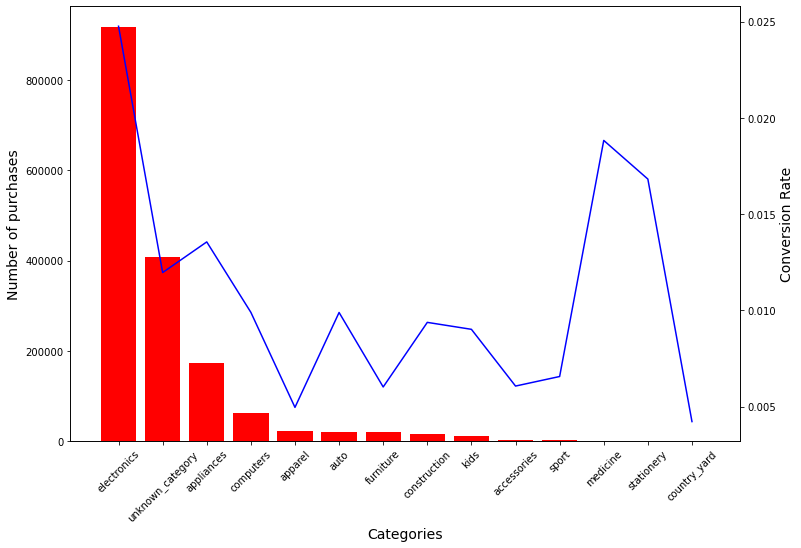

In [8]:
tot = funcs.conversion_rate_per_category(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'])

## Research Question 7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
- Prove that the pareto principle applies to your store.


Running data_set: data/2019-Oct.csv


Running data_set: data/2019-Nov.csv


[========================================================================] 100%


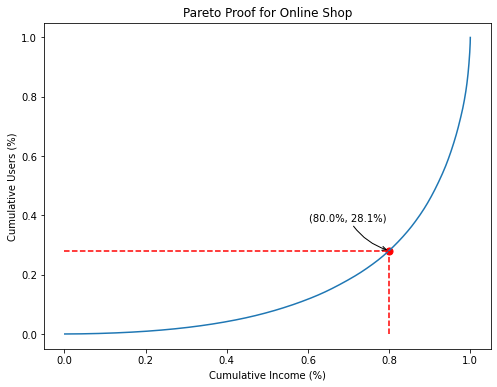

In [2]:
funcs.pareto_proof_online_shop(data_sets=['data/2019-Oct.csv', 'data/2019-Nov.csv'], income_threshold=0.8)

In [118]:
data_1 = pd.read_csv('data/2019-Oct.csv', nrows=1000000)
data_2 = pd.read_csv('data/2019-Nov.csv', nrows=1000000)
data_tot = pd.concat((data_1, data_2))

In [15]:
test_1 = data_1[data_1.event_type == 'view'].groupby(['event_time', 'category']).price.count().reset_index(name='count_brand').set_index(['event_time', 'category'])
test_2 = data_2[data_2.event_type == 'view'].groupby(['brand']).price.count().reset_index(name='count_brand').set_index(['brand'])

In [16]:
test_1

,count_brand
brand,
a-case,3
a-elita,1
academie,1
acer,94
acme,2
...,...
zemex,1
zeppelin,1
zerten,1


In [17]:
test_2

,count_brand
brand,
a-case,4
acer,77
acme,8
activision,1
adamex,3
...,...
yato,7
yokohama,34
zeta,11


In [18]:
test_final = test_1.add(test_2, fill_value=0)

In [19]:
test_final

,count_brand
brand,
a-case,7.0
a-elita,1.0
academie,1.0
acer,171.0
acme,10.0
...,...
zerten,1.0
zeta,20.0
zilmer,2.0


In [30]:
data_tot['event_time'] = pd.to_datetime(data_tot.event_time)

In [31]:
data_tot

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
999995,2019-11-01 15:32:09+00:00,view,11400039,2053013558458843721,NaN,iwalk,42.87,558486078,5754f825-f3b4-4bf0-9b88-9ee36b5cb6b7
999996,2019-11-01 15:32:09+00:00,view,2800546,2053013563835941749,appliances.kitchen.refrigerators,xing,192.51,513747948,d9ae554d-1841-412d-aefb-daa105910574
999997,2019-11-01 15:32:09+00:00,view,15700000,2053013559733912211,NaN,bts,388.14,553671602,3ce4bddb-fd33-4834-9bb9-137cd4d19199
999998,2019-11-01 15:32:09+00:00,view,23301744,2053013561956893455,NaN,adel,67.12,512449119,9681516f-4845-44fb-881b-9ba2c271f34f


In [40]:
data_tot_view = data_tot[data_tot.event_type == 'view']
data_tot_view['day'] = data_tot_view.event_time.dt.dayofweek
data_tot_view = data_tot_view[data_tot_view.day == 1]

C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
data_tot_view['month'] = data_tot_view.event_time.dt.month
data_tot_view['hour'] = data_tot_view.event_time.dt.hour
data_tot_view['week'] = data_tot_view.event_time.dt.week

C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
data_tot_view

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,month,hour
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,1,10,0
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,1,10,0
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,1,10,0
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,1,10,0
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-10-01 16:56:07+00:00,view,1005115,2053013555631882655,electronics.smartphone,apple,975.56,555714787,cdbcf82e-be79-4068-a74b-e8dd93a4c581,1,10,16
999996,2019-10-01 16:56:07+00:00,view,26403239,2053013563651392361,NaN,NaN,77.22,514338564,c28046f7-ffda-4313-878e-b65a530f5acb,1,10,16
999997,2019-10-01 16:56:07+00:00,view,1307338,2053013558920217191,computers.notebook,asus,849.42,551293583,a7081bbb-82b3-4917-9e20-da3af7e00d59,1,10,16
999998,2019-10-01 16:56:07+00:00,view,1004873,2053013555631882655,electronics.smartphone,samsung,388.42,532714334,33e86088-8617-41c1-8e7e-2b95b033a6af,1,10,16


Text(0.5, 1.0, 'Monday')

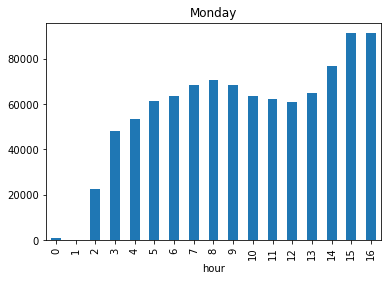

In [53]:
import matplotlib.pyplot as plt
test_group = data_tot_view.groupby(['month', 'week', 'hour']).price.count().groupby(['hour']).mean().plot.bar()
plt.title('Monday')

In [50]:
test_group

hour
0      1070
1       121
2     22326
3     47951
4     53390
5     61234
6     63713
7     68550
8     70767
9     68482
10    63570
11    62162
12    60799
13    64772
14    76990
15    91425
16    91191
Name: price, dtype: int64

In [55]:
data_tot
data_tot['event_time_month'] = pd.to_datetime(data_tot.event_time).dt.month

In [61]:
import re
data_tot = data_tot[~data_tot.category_code.isnull()]
data_tot['subcategory_code'] =data_tot['category_code'].apply(
            lambda x: re.findall(r'\.(.*)', x)[0] if len(x.split('.')) != 1 else x)

C:\Users\juanm\Anaconda3\envs\data_science_general\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
test = data_tot.groupby(['event_time_month', 'subcategory_code']).user_id.count().reset_index(name='count_sub_categories').set_index(['event_time_month', 'subcategory_code'])

In [91]:
processed_data_set = pd.DataFrame(columns=['event_time_month', 'subcategory_code', 'count_sub_categories'])
processed_data_set.set_index(['event_time_month', 'subcategory_code'], inplace=True)


In [83]:
inital_data_set = pd.DataFrame(columns=['count_sub_categories'], index=['event_time_month', 'subcategory_code', ])

In [92]:
processed_data_set

,,count_sub_categories
event_time_month,subcategory_code,


In [95]:
processed_data_set = test.add(processed_data_set, fill_value=0)

In [94]:
processed_data_set

count_sub_categories
event_time_month subcategory_code                           
10               accessories.alarm                      4951
                 accessories.compressor                 1706
                 accessories.parktronic                  325
                 accessories.player                    11479
                 accessories.radar                       859
...                                                      ...
11               underwear                               760
                 universal.light                         214
                 video.projector                         312
                 video.tv                              29459
                 wallet                                  983

[246 rows x 1 columns]

In [104]:
x = processed_data_set.groupby(['event_time_month', 'subcategory_code'])

TypeError: 'DataFrameGroupBy' object is not callable

In [106]:
x = processed_data_set.groupby(level=0, group_keys=False).apply(
        lambda x: x.sort_values(by=['count_sub_categories'], ascending=False).head(20))


<AxesSubplot:xlabel='event_time_month,subcategory_code'>

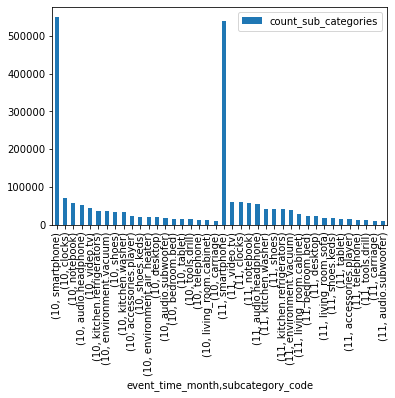

In [108]:
x.plot.bar()

In [109]:
top_ten=data_tot.groupby('brand').price.mean().sort_values(ascending=False).head(10)
last_ten=data_tot.groupby('brand').price.mean().sort_values(ascending=False).tail(10)

In [110]:
top_ten

brand
pinarello     2573.810000
rado          2186.142628
jura          2104.791091
climadiff     2051.337500
minimotors    1993.314655
oris          1812.156847
hartan        1801.820000
dynacord      1753.641333
sbw           1750.370000
shua          1706.599130
Name: price, dtype: float64

In [111]:
last_ten

brand
azbukvarik    6.0000
acd           5.5300
colorfix      5.4600
egp           5.0700
inkax         5.0425
altacto       4.6500
origami       4.3500
crockid       4.3400
nici          3.8600
chenri        3.5800
Name: price, dtype: float64

In [112]:
test = pd.concat((top_ten, last_ten))

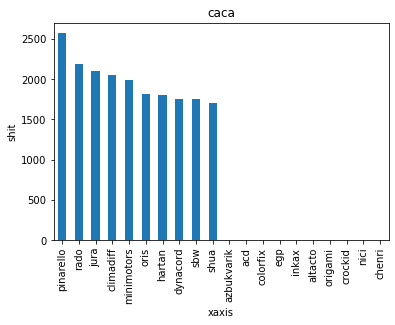

In [116]:
test.plot.bar()
plt.title('caca')
plt.xlabel('xaxis')
plt.ylabel('shit')
plt.show()

In [117]:
data_tot

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_month,subcategory_code
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,10,environment.water_heater
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,10,living_room.sofa
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,10,notebook
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,10,smartphone
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,10,desktop
...,...,...,...,...,...,...,...,...,...,...,...
999988,2019-11-01 15:32:09+00:00,view,21408160,2053013561579406073,electronics.clocks,NaN,2574.07,561180446,f9858873-a601-42c9-80ca-e3f710742d2c,11,clocks
999989,2019-11-01 15:32:09+00:00,view,46800028,2110187395394568257,appliances.kitchen.refrigerators,coolfort,77.20,517774726,37296599-f700-4b74-84a3-298134813eb4,11,kitchen.refrigerators
999993,2019-11-01 15:32:09+00:00,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,211.32,552024896,16f59979-9d95-41e5-9e45-5ee3171accb8,11,smartphone
999996,2019-11-01 15:32:09+00:00,view,2800546,2053013563835941749,appliances.kitchen.refrigerators,xing,192.51,513747948,d9ae554d-1841-412d-aefb-daa105910574,11,kitchen.refrigerators


In [120]:
purchases_df = data_tot[data_tot.event_type == 'purchase']
purchases_df = purchases_df[~purchases_df.category_code.isnull()]

# Introduce the column category
purchases_df['category'] = purchases_df['category_code'].apply(lambda x: x.split('.')[0])

# Convert event time into month
purchases_df['event_time'] = pd.to_datetime(purchases_df.event_time)
purchases_df['event_time'] = purchases_df.event_time.dt.month

<AxesSubplot:xlabel='event_time,category'>

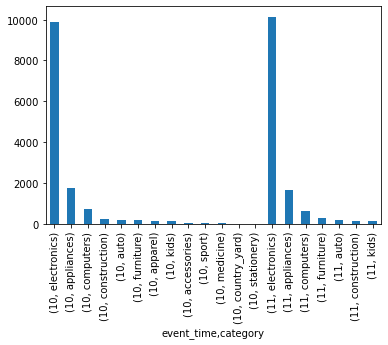

In [121]:
purchases_df.groupby('event_time')['category'].value_counts().head(20).plot.bar()

In [122]:
purchases_df_test = purchases_df.groupby('event_time')['category'].value_counts()
purchases_df_test = purchases_df_test.groupby(level=0, group_keys=False).apply(
    lambda x: x.sort_values(ascending=False).head(20))

In [124]:
test = purchases_df_test.reset_index(name='sold_products_per_category')

In [125]:
test

,event_time,category,sold_products_per_category
0,10,electronics,9890
1,10,appliances,1757
2,10,computers,715
3,10,construction,206
4,10,auto,192
5,10,furniture,166
6,10,apparel,130
7,10,kids,127
8,10,accessories,40
9,10,sport,24


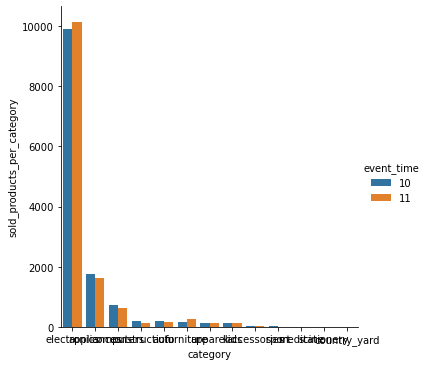

In [126]:
import seaborn as sns


sns.catplot(x = "category",       # x variable name
            y = "sold_products_per_category",       # y variable name
            hue = "event_time",  # group variable name
            data = test,     # dataframe to plot
            kind = "bar")